# Import External Data

In [3]:
# Import external file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
# some necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models

from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars.csv', header = 0, encoding='latin-1')
print('rows and columns:', df.shape)
df.head() # preview first 5 rows of data
# set seed for reproducibility
#np.random.seed(1234)

rows and columns: (41007, 9)


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0


### Graph

Cars for Sale in Moldova. The model should be able to predict the transmission type of a car based on the data above.

<Axes: xlabel='Transmission', ylabel='Count'>

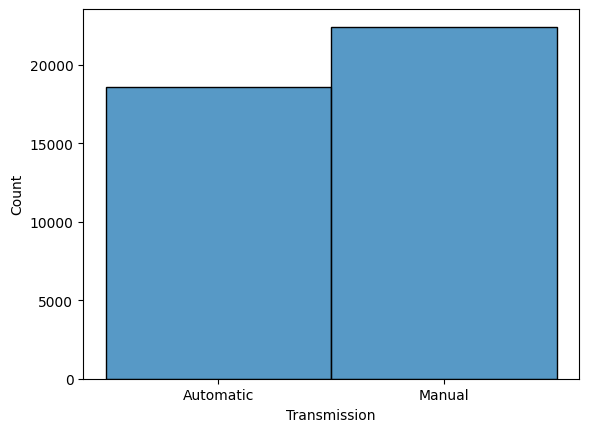

In [ ]:
import seaborn as sns
sns.histplot(df.Transmission)

<Axes: xlabel='Make', ylabel='Count'>

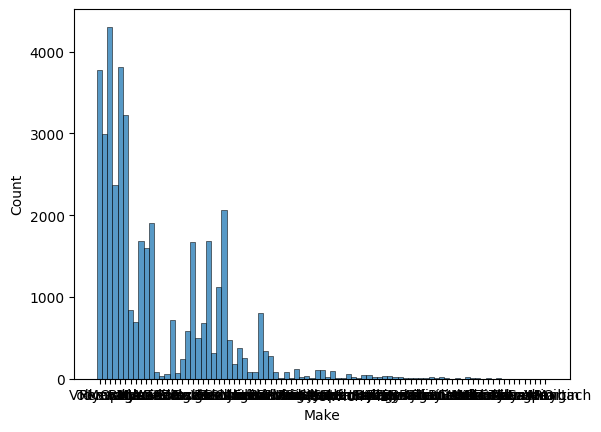

In [ ]:
sns.histplot(df.Make)

<Axes: xlabel='Style', ylabel='Count'>

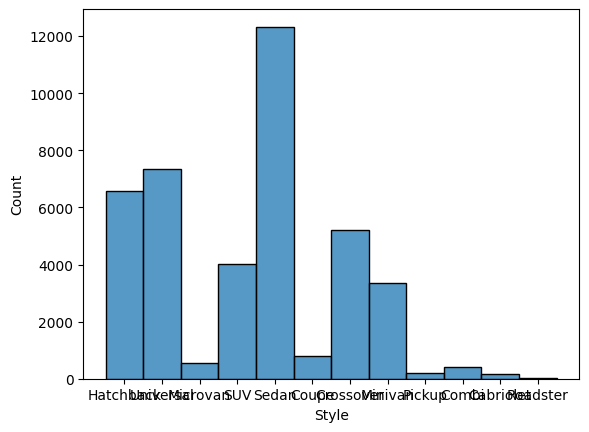

In [ ]:
sns.histplot(df.Style)

# Sequential Network

Trying to predict transmssion based on car style.

In [ ]:
# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
print("train data size: ", train.shape)
print("test data size: ", test.shape)

train data size:  (32724, 9)
test data size:  (8283, 9)


In [ ]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Style)

x_train = tokenizer.texts_to_matrix(train.Style, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Style, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (32724, 25000) (32724,)
test shapes: (8283, 25000) (8283,)
test first five labels: [1 0 0 1 0]


In [ ]:
# fit model
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
295/295 [==============================] - 9s 27ms/step - loss: 0.6364 - accuracy: 0.6572 - val_loss: 0.6092 - val_accuracy: 0.6502
Epoch 2/30
295/295 [==============================] - 9s 29ms/step - loss: 0.6150 - accuracy: 0.6651 - val_loss: 0.6112 - val_accuracy: 0.6462
Epoch 3/30
295/295 [==============================] - 7s 23ms/step - loss: 0.6150 - accuracy: 0.6645 - val_loss: 0.6136 - val_accuracy: 0.6489
Epoch 4/30
295/295 [==============================] - 9s 29ms/step - loss: 0.6148 - accuracy: 0.6646 - val_loss: 0.6108 - val_accuracy: 0.6489
Epoch 5/30
295/295 [==============================] - 7s 23ms/step - loss: 0.6149 - accuracy: 0.6646 - val_loss: 0.6130 - val_accuracy: 0.6462
Epoch 6/30
295/295 [==============================] - 9s 29ms/step - loss: 0.6149 - accuracy: 0.6649 - val_loss: 0.6089 - val_accuracy: 0.6502
Epoch 7/30
295/295 [==============================] - 7s 23ms/step - loss: 0.6150 - accuracy: 0.6648 - val_loss: 0.6117 - val_accuracy: 0.6499

In [ ]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

83/83 [==============================] - 1s 8ms/step - loss: 0.6176 - accuracy: 0.6588
Accuracy:  0.6588192582130432


In [ ]:
print(score)

[0.617624819278717, 0.6588192582130432]


#### Accuracy 66% 

Out of all the models ran, this one performs the best. I think that is because there is not much overlap with each type of network connection compared to the others.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]

print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

259/259 [==============================] - 1s 4ms/step
accuracy score:  0.6588192683810213
precision score:  0.7241292276627965
recall score:  0.6234245980008691
f1 score:  0.6700140121438579


#### Precision Score 74%

# Sequential Network 2.0

Trying the same model with different input. Trying to predict transmission based on Make this time instead.

In [ ]:
# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Make)

x_train = tokenizer.texts_to_matrix(train.Make, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Make, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (32695, 25000) (32695,)
test shapes: (8312, 25000) (8312,)
test first five labels: [1 1 1 0 1]


In [ ]:
# fit model
model = models.Sequential()
model.add(layers.Dense(32, input_dim=vocab_size, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=30,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/30
295/295 [==============================] - 11s 34ms/step - loss: 0.6114 - accuracy: 0.6922 - val_loss: 0.5472 - val_accuracy: 0.7147
Epoch 2/30
295/295 [==============================] - 10s 33ms/step - loss: 0.5646 - accuracy: 0.7039 - val_loss: 0.5479 - val_accuracy: 0.7128
Epoch 3/30
295/295 [==============================] - 10s 34ms/step - loss: 0.5626 - accuracy: 0.7049 - val_loss: 0.5474 - val_accuracy: 0.7144
Epoch 4/30
295/295 [==============================] - 10s 33ms/step - loss: 0.5615 - accuracy: 0.7048 - val_loss: 0.5487 - val_accuracy: 0.7141
Epoch 5/30
295/295 [==============================] - 9s 30ms/step - loss: 0.5614 - accuracy: 0.7043 - val_loss: 0.5478 - val_accuracy: 0.7141
Epoch 6/30
295/295 [==============================] - 11s 36ms/step - loss: 0.5613 - accuracy: 0.7050 - val_loss: 0.5464 - val_accuracy: 0.7135
Epoch 7/30
295/295 [==============================] - 13s 44ms/step - loss: 0.5610 - accuracy: 0.7045 - val_loss: 0.5436 - val_accuracy: 

In [ ]:
# evaluate
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print('Accuracy: ', score[1])

84/84 [==============================] - 1s 11ms/step - loss: 0.5621 - accuracy: 0.7020
Accuracy:  0.7019971013069153


#### Accuracy 70%

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# get predictions so we can calculate more metrics
pred = model.predict(x_test)
pred_labels = [1 if p>0.5 else 0 for p in pred]

print('accuracy score: ', accuracy_score(y_test, pred_labels))
print('precision score: ', precision_score(y_test, pred_labels))
print('recall score: ', recall_score(y_test, pred_labels))
print('f1 score: ', f1_score(y_test, pred_labels))

260/260 [==============================] - 1s 4ms/step
accuracy score:  0.7019971126082772
precision score:  0.7529525186791998
recall score:  0.6826923076923077
f1 score:  0.7161031518624642


#### Precision Score 75%

## Sequential Network Summary

Using the make of the car instead of the car style was much more helpful to the model in predicting transmission types with sequential networking.

# Recurrent Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Style)

x_train = tokenizer.texts_to_matrix(train.Style, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Style, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# Reserve samples for validation
x_train = x_train[-40:]
y_train = y_train[-40:]
x_test = x_test[:-40]
y_test = y_test[:-40]

In [ ]:
# build a Sequential model with Embedding and SimpleRNN layers

max_features = 10000

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train on 40 test items

In [ ]:
# train

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 88s 88s/step - loss: 0.6754 - accuracy: 0.6875 - val_loss: 0.6755 - val_accuracy: 0.6250
Epoch 2/10
1/1 [==============================] - 91s 91s/step - loss: 0.6649 - accuracy: 0.6875 - val_loss: 0.6667 - val_accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 96s 96s/step - loss: 0.6477 - accuracy: 0.6875 - val_loss: 0.6623 - val_accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 98s 98s/step - loss: 0.6351 - accuracy: 0.6875 - val_loss: 0.6622 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 102s 102s/step - loss: 0.6256 - accuracy: 0.6875 - val_loss: 0.6667 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 98s 98s/step - loss: 0.6216 - accuracy: 0.6875 - val_loss: 0.6701 - val_accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 95s 95s/step - loss: 0.6211 - accuracy: 0.6875 - val_loss: 0.6704 - val_accuracy: 0.6250
Epoch 8/10
1/1 [=========

##### 68% accuracy 

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

257/257 [==============================] - 382s 1s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3675
           1       0.55      1.00      0.71      4524

    accuracy                           0.55      8199
   macro avg       0.28      0.50      0.36      8199
weighted avg       0.30      0.55      0.39      8199



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 55% Accuracy

In [ ]:
x_train = tokenizer.texts_to_matrix(train.Style, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Style, mode='tfidf')
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# Reserve samples for validation
x_train = x_train[-400:]
y_train = y_train[-400:]
x_test = x_test[:-400]
y_test = y_test[:-400]

#### Train on 400 test items

In [ ]:
# train

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 407s 134s/step - loss: 0.6820 - accuracy: 0.6000 - val_loss: 0.6676 - val_accuracy: 0.6125
Epoch 2/10
3/3 [==============================] - 429s 139s/step - loss: 0.6734 - accuracy: 0.6000 - val_loss: 0.6683 - val_accuracy: 0.6125
Epoch 3/10
3/3 [==============================] - 410s 143s/step - loss: 0.6743 - accuracy: 0.6000 - val_loss: 0.6685 - val_accuracy: 0.6125
Epoch 4/10
3/3 [==============================] - 486s 146s/step - loss: 0.6747 - accuracy: 0.6000 - val_loss: 0.6678 - val_accuracy: 0.6125
Epoch 5/10
3/3 [==============================] - 412s 139s/step - loss: 0.6739 - accuracy: 0.6000 - val_loss: 0.6704 - val_accuracy: 0.6125
Epoch 6/10
3/3 [==============================] - 450s 141s/step - loss: 0.6740 - accuracy: 0.6000 - val_loss: 0.6680 - val_accuracy: 0.6125
Epoch 7/10
3/3 [==============================] - 321s 103s/step - loss: 0.6732 - accuracy: 0.6000 - val_loss: 0.6676 - val_accuracy: 0.6125
Epoch 8/10
3/

##### 60% accuracy

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

245/245 [==============================] - 334s 1s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3534
           1       0.55      1.00      0.71      4305

    accuracy                           0.55      7839
   macro avg       0.27      0.50      0.35      7839
weighted avg       0.30      0.55      0.39      7839



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Accuracy is 55%

## Recurrenn Neural Network Summary

Using more test items surprisingly lowered the accuracy of the results of the model when using style to predict transmission type.

# Recurrent Neural Network 2.0

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

# set up X and Y
num_labels = 2
vocab_size = 25000
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Make)

x_train = tokenizer.texts_to_matrix(train.Make, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Make, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# Reserve samples for validation
x_train = x_train[-40:]
y_train = y_train[-40:]
x_test = x_test[:-40]
y_test = y_test[:-40]

In [ ]:
# build a Sequential model with Embedding and SimpleRNN layers

max_features = 10000

model = models.Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Train on 40 test items

In [ ]:
# train

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 99s 99s/step - loss: 0.8928 - accuracy: 0.2500 - val_loss: 0.6995 - val_accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 87s 87s/step - loss: 0.7055 - accuracy: 0.2500 - val_loss: 0.6637 - val_accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 86s 86s/step - loss: 0.6165 - accuracy: 0.7500 - val_loss: 0.6617 - val_accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 86s 86s/step - loss: 0.5938 - accuracy: 0.7500 - val_loss: 0.6639 - val_accuracy: 0.6250
Epoch 5/10
1/1 [==============================] - 95s 95s/step - loss: 0.5822 - accuracy: 0.7500 - val_loss: 0.6676 - val_accuracy: 0.6250
Epoch 6/10
1/1 [==============================] - 88s 88s/step - loss: 0.5750 - accuracy: 0.7500 - val_loss: 0.6719 - val_accuracy: 0.6250
Epoch 7/10
1/1 [==============================] - 86s 86s/step - loss: 0.5704 - accuracy: 0.7500 - val_loss: 0.6763 - val_accuracy: 0.6250
Epoch 8/10
1/1 [===========

#### Accuracy 70%

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

## Recurrent Neural Network 2.0 Summary

The model was more accurate with 40 test items that used the Make to predict transmission type over style.

# Convolutional Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, preprocessing

In [ ]:
# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

# set up X and Y
num_labels = 2
vocab_size = 500
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Style)

x_train = tokenizer.texts_to_matrix(train.Style, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Style, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

# Reserve samples for validation
x_train = x_train[-40:]
y_train = y_train[-40:]
x_test = x_test[:-40]
y_test = y_test[:-40]

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

train shapes: (40, 500) (40,)
test shapes: (8272, 500) (8272,)
test first five labels: [1 1 1 0 1]


In [ ]:
# build a Sequential model 1D convnet
max_features = 10000
maxlen = 500

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 494, 32)           28704     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 98, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
# compile

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# train

history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 0s 217ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 3/10
1/1 [==============================] - 0s 160ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 4/10
1/1 [==============================] - 0s 175ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 5/10
1/1 [==============================] - 0s 165ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 6/10
1/1 [==============================] - 0s 156ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 0s 161ms/step - loss: 10.1226 - accuracy: 0.3438 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 8/10
1/1 [

#### 34% Accuracy

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

259/259 [==============================] - 9s 35ms/step
              precision    recall  f1-score   support

           0       0.45      1.00      0.62      3726
           1       0.00      0.00      0.00      4546

    accuracy                           0.45      8272
   macro avg       0.23      0.50      0.31      8272
weighted avg       0.20      0.45      0.28      8272



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 45% Accuracy

## Convolutional Neural Network Summary

Worst performance so far. Did not take long at all to run however produced the most poor results. 

# Adding Embedded Layer

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [5]:
# split df into train and test
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

# set up X and Y
num_labels = 2
vocab_size = 500
batch_size = 100

# fit the tokenizer on the training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Style)

x_train = tokenizer.texts_to_matrix(train.Style, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Style, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Transmission)
y_train = encoder.transform(train.Transmission)
y_test = encoder.transform(test.Transmission)

In [6]:
from tensorflow.keras import layers

EMBEDDING_DIM = 128
MAX_SEQUENCE_LENGTH = 200

embedding_layer = layers.Embedding(len(x_train) + 1,
                            EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH)

In [7]:
# add more layers

int_sequences_input = keras.Input(shape=(None,), dtype="int64")
embedded_sequences = embedding_layer(int_sequences_input)
x = layers.Conv1D(128, 5, activation="relu")(embedded_sequences)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(128, 5, activation="relu")(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)
preds = layers.Dense(len(x_train), activation="softmax")(x)
model = keras.Model(int_sequences_input, preds)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         4177664   
                                                                 
 conv1d (Conv1D)             (None, None, 128)         82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 128)        0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 128)        0         
 1D)                                                         

In [8]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["acc"]
)
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_train, y_train))


Epoch 1/20
255/255 [==============================] - 460s 2s/step - loss: 1.0423 - acc: 0.5096 - val_loss: 0.6985 - val_acc: 0.4518
Epoch 2/20
255/255 [==============================] - 439s 2s/step - loss: 0.7368 - acc: 0.5057 - val_loss: 0.6904 - val_acc: 0.5482
Epoch 3/20
255/255 [==============================] - 442s 2s/step - loss: 0.7259 - acc: 0.5190 - val_loss: 0.6886 - val_acc: 0.5482
Epoch 4/20
255/255 [==============================] - 450s 2s/step - loss: 0.7216 - acc: 0.5174 - val_loss: 0.7276 - val_acc: 0.4518
Epoch 5/20
255/255 [==============================] - 453s 2s/step - loss: 0.7165 - acc: 0.5176 - val_loss: 0.6890 - val_acc: 0.5482
Epoch 6/20
255/255 [==============================] - 457s 2s/step - loss: 0.7155 - acc: 0.5189 - val_loss: 0.7077 - val_acc: 0.5482
Epoch 7/20
255/255 [==============================] - 458s 2s/step - loss: 0.7137 - acc: 0.5137 - val_loss: 0.6944 - val_acc: 0.4518
Epoch 8/20
255/255 [==============================] - 456s 2s/step - 

#### Accuracy 67% (Took 3hrs to finish running)

## Summary

Adding an embedded layer produced mid range results. However I do not think adding the embedded layer was worth while because it took about 3hrs to fully complete and didn ot give results enough to impress me. Similar results came from running the Recurrent Neural Network. And even then the resulting accuracy was still higher. Overall, sequential networking seems to be the best in terms of highest accuracy and lowest runtime for the size of the given dataset.